# Refatoração da aula 4.
Nesse notebook eu refatoro as funções presentes nesse material: https://github.com/raphaeltinarrage/EMAp/blob/main/Tutorial1-Correction.ipynb <br>
Irei me referenciar esse código como <b>Material Original</b><br><br>
A maior motivação pra isso é facilitar o entendimento do código. <br>
Também apresento algumas questões do NetworkX

In [1]:
import gudhi 
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

### Funções do Material Original

In [2]:
def PrintSimplices(simpcomplex):
    simplices = {i:[] for i in range(simpcomplex.dimension()+1)}
    for filtration in simpcomplex.get_simplices():
        simplex = filtration[0]
        simplices[len(simplex)-1].append(simplex)
    print('The simplicial complex contains the following simplices: ')
    for i in range(simpcomplex.dimension()+1):
        print('Dimension '+repr(i)+': ', end="")
        print(*simplices[i], sep = ", ")
        
def DrawSimplicialComplex(simpcomplex, pos=None):
    nodes=[]; edges=[]
    for filtr in simpcomplex.get_skeleton(1):
        simplex = filtr[0]
        if len(simplex)==1:
            nodes.append(simplex[0])
        if len(simplex)==2:
            edges.append(simplex)
    G = nx.Graph()
    G.add_nodes_from(nodes)
    G.add_edges_from(edges)
    if pos == None:
        pos = nx.spring_layout(G)
    nx.draw(G, pos=pos, with_labels=True, font_weight='bold', node_color='magenta')
    
def NumberOfConnectedComponents(simpcomplex, verbose = 'True'):
    simpcomplex.compute_persistence()
    nbr_components = simpcomplex.betti_numbers()[0]
    if verbose: print('The simplicial complex admits '+repr(nbr_components)+' connected component(s).')
    return nbr_components

def EulerCharacteristic(simpcomplex, verbose = 'True'):
    num_simplices = [0 for i in range(simpcomplex.dimension()+1)]
    for filtration in simpcomplex.get_simplices():
        simplex = filtration[0]
        num_simplices[len(simplex)-1]+=1
    Euler_characteristic = sum(num_simplices[::2]) - sum(num_simplices[1::2])
    if verbose: print('The simplicial complex has Euler characteristic equal to '+repr(Euler_characteristic)+'.')
    return Euler_characteristic

# Refatorando 

In [3]:
#Vou criar um objeto Gudhi que irei usar nos exemplos de refatoração
simpcomplex = gudhi.SimplexTree()

simpcomplex.insert([1,2])
simpcomplex.insert([2,3])
simpcomplex.insert([3,4])
simpcomplex.insert([4,2])
simpcomplex.insert([4,5,6])
simpcomplex.insert([6,7,8,9])

True

### Refatorando a PrintSimplices

In [4]:
def PrintSimplices(simpcomplex):
    simplices = {i:[] for i in range(simpcomplex.dimension()+1)}
    for filtration in simpcomplex.get_simplices():
        simplex = filtration[0]
        simplices[len(simplex)-1].append(simplex)
    print('The simplicial complex contains the following simplices: ')
    for i in range(simpcomplex.dimension()+1):
        print('Dimension '+repr(i)+': ', end="")
        print(*simplices[i], sep = ", ")

In [5]:
PrintSimplices(simpcomplex)

The simplicial complex contains the following simplices: 
Dimension 0: [1], [2], [3], [4], [5], [6], [7], [8], [9]
Dimension 1: [1, 2], [2, 3], [2, 4], [3, 4], [4, 5], [4, 6], [5, 6], [6, 7], [6, 8], [6, 9], [7, 8], [7, 9], [8, 9]
Dimension 2: [4, 5, 6], [6, 7, 8], [6, 7, 9], [6, 8, 9], [7, 8, 9]
Dimension 3: [6, 7, 8, 9]


In [6]:
#simplices = {i:[] for i in range(simpcomplex.dimension()+1)}
maiorDimensao = simpcomplex.dimension()
#cria um dicionario da dimensao 0 até maiorDimensao
simplices={}
for dimensao in range(simpcomplex.dimension()+1):
    simplices[dimensao]=[]
simplices

{0: [], 1: [], 2: [], 3: []}

In [7]:
for simplex, filtration in simpcomplex.get_simplices():
    #pela qtde de elementos no simplexo, descobre a sua dimensão
    simplices[len(simplex)-1].append(simplex)
#Em simplices, a chave é a dimensao e o valor é a lista de simpleços da dimensao

##### Vou refatorar a função PrintSimplices, transformando ela em duas funções com escopo mais bem definido

In [8]:
def getSimplicesByDimension(simpcomplex):
    maiorDimensao = simpcomplex.dimension()
    #cria um dicionario da dimensao 0 até maiorDimensao
    simplices={}
    for dimensao in range(simpcomplex.dimension()+1):
        simplices[dimensao]=[]
    for simplex, filtration in simpcomplex.get_simplices():
        #pela qtde de elementos no simplexo, descobre a sua dimensão
        simplices[len(simplex)-1].append(simplex)

    return simplices

def PrintSimplicesRefatorado(simpcomplex):
    #chama a funcao de cima
    simplices=getSimplicesByDimension(simpcomplex)
    print("The simplicial complex contains the following simplices:")
    for dimensao,simps in simplices.items():
        string = "Dimension "+str(dimensao)+' ('+str(len(simps))+')'+' : '
        print(string,simps)

In [9]:
PrintSimplicesRefatorado(simpcomplex)

The simplicial complex contains the following simplices:
Dimension 0 (9) :  [[1], [2], [3], [4], [5], [6], [7], [8], [9]]
Dimension 1 (13) :  [[1, 2], [2, 3], [2, 4], [3, 4], [4, 5], [4, 6], [5, 6], [6, 7], [6, 8], [6, 9], [7, 8], [7, 9], [8, 9]]
Dimension 2 (5) :  [[4, 5, 6], [6, 7, 8], [6, 7, 9], [6, 8, 9], [7, 8, 9]]
Dimension 3 (1) :  [[6, 7, 8, 9]]


### Refatorando a EulerCharacteristic

In [10]:
def EulerCharacteristic(simpcomplex, verbose = 'True'):
    num_simplices = [0 for i in range(simpcomplex.dimension()+1)]
    for filtration in simpcomplex.get_simplices():
        simplex = filtration[0]
        num_simplices[len(simplex)-1]+=1
    Euler_characteristic = sum(num_simplices[::2]) - sum(num_simplices[1::2])
    if verbose: print('The simplicial complex has Euler characteristic equal to '+repr(Euler_characteristic)+'.')
    return Euler_characteristic

A Caracteristica Euler é dada por:<br>
qtde de simplexos de dim 0 - qtde de simplexos de dim 1 + qtde de simplexos de dim 2 - qtde de simplexos de dim 3 + qtde de simplexos de dim 4... <br>
Então preciso saber a qtde de simplexos em cada dimensao:

In [11]:
#Vou usar a funcao que já criei, pois ela retorna a lista de simplexos por dimensao

simplixosPorDimensao = [len(lista) for lista in getSimplicesByDimension(simpcomplex).values()]

#Vou somar o total de simplexos nas dimensões 0,2,4,6...
dimPares = sum(simplixosPorDimensao[::2])

#Vou somar o total de simplexos nas dimensões 1,3,5,7...
dimImpares = sum(simplixosPorDimensao[1::2])

Euler_characteristic = dimPares-dimImpares
Euler_characteristic

0

In [12]:
def EulerCharacteristicRefatorado(simpcomplex, verbose = True):
    #Vou usar a funcao que já criei, pois ela retorna a lista de simplexos por dimensao
    simplixosPorDimensao = [len(lista) for lista in getSimplicesByDimension(simpcomplex).values()]
    #Vou somar o total de simplexos nas dimensões 0,2,4,6...
    dimPares = sum(simplixosPorDimensao[::2])
    #Vou somar o total de simplexos nas dimensões 1,3,5,7...
    dimImpares = sum(simplixosPorDimensao[1::2])
    Euler_characteristic = dimPares-dimImpares
    
    if verbose:
        print('The simplicial complex has Euler characteristic equal to '+str(Euler_characteristic)+'.')
    else:
        return Euler_characteristic

In [13]:
EulerCharacteristic(simpcomplex, verbose = 'True')

The simplicial complex has Euler characteristic equal to 0.


0

In [14]:
EulerCharacteristicRefatorado(simpcomplex)

The simplicial complex has Euler characteristic equal to 0.


In [15]:
EulerCharacteristicRefatorado(simpcomplex,verbose=False)

0

#### Refatorando a DrawSimplicialComplex

In [16]:
def DrawSimplicialComplex(simpcomplex, pos=None):
    nodes=[]; edges=[]
    for filtr in simpcomplex.get_skeleton(1):
        simplex = filtr[0]
        if len(simplex)==1:
            nodes.append(simplex[0])
        if len(simplex)==2:
            edges.append(simplex)
    G = nx.Graph()
    G.add_nodes_from(nodes)
    G.add_edges_from(edges)
    if pos == None:
        pos = nx.spring_layout(G)
    nx.draw(G, pos=pos, with_labels=True, font_weight='bold', node_color='magenta')

Aqui também vou quebrar a função original em duas. Uma que recebe um objeto objeto gudhi e retorna uma rede do networkx, e outra que plota

In [17]:
def createNetworkxFromGudhi(simpcomplex):
    '''
    Given a simplicial complex (Gudhi), creates a NetworkX network
    '''
    G = nx.Graph()
    #simpcomplex.get_skeleton(1)
    #retorna todos os simplexos de dimensão 0 e 1
    for filtr in simpcomplex.get_skeleton(1):
        simplex = filtr[0] # filtr[0] é o simplexo, filtr[1] é um valor que não sei oq é...
        if len(simplex)==1: # é um vertice
            G.add_node(simplex[0])
        if len(simplex)==2: # é uma aresta
            G.add_edge(simplex[0],simplex[1]) # mesma coisa que *simplex
    return G



In [18]:
def DrawSimplicialComplexRefatorado(simpcomplex):
    network=createNetworkxFromGudhi(simpcomplex)
    plt.figure(figsize=(10,8),dpi=200)
    nx.draw_kamada_kawai(network,with_labels=True,node_size=250,font_size=14)
    plt.show()

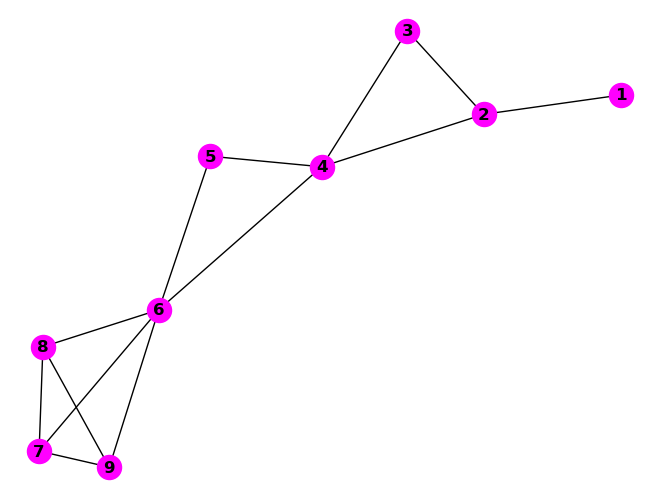

In [19]:
DrawSimplicialComplex(simpcomplex)
plt.show()

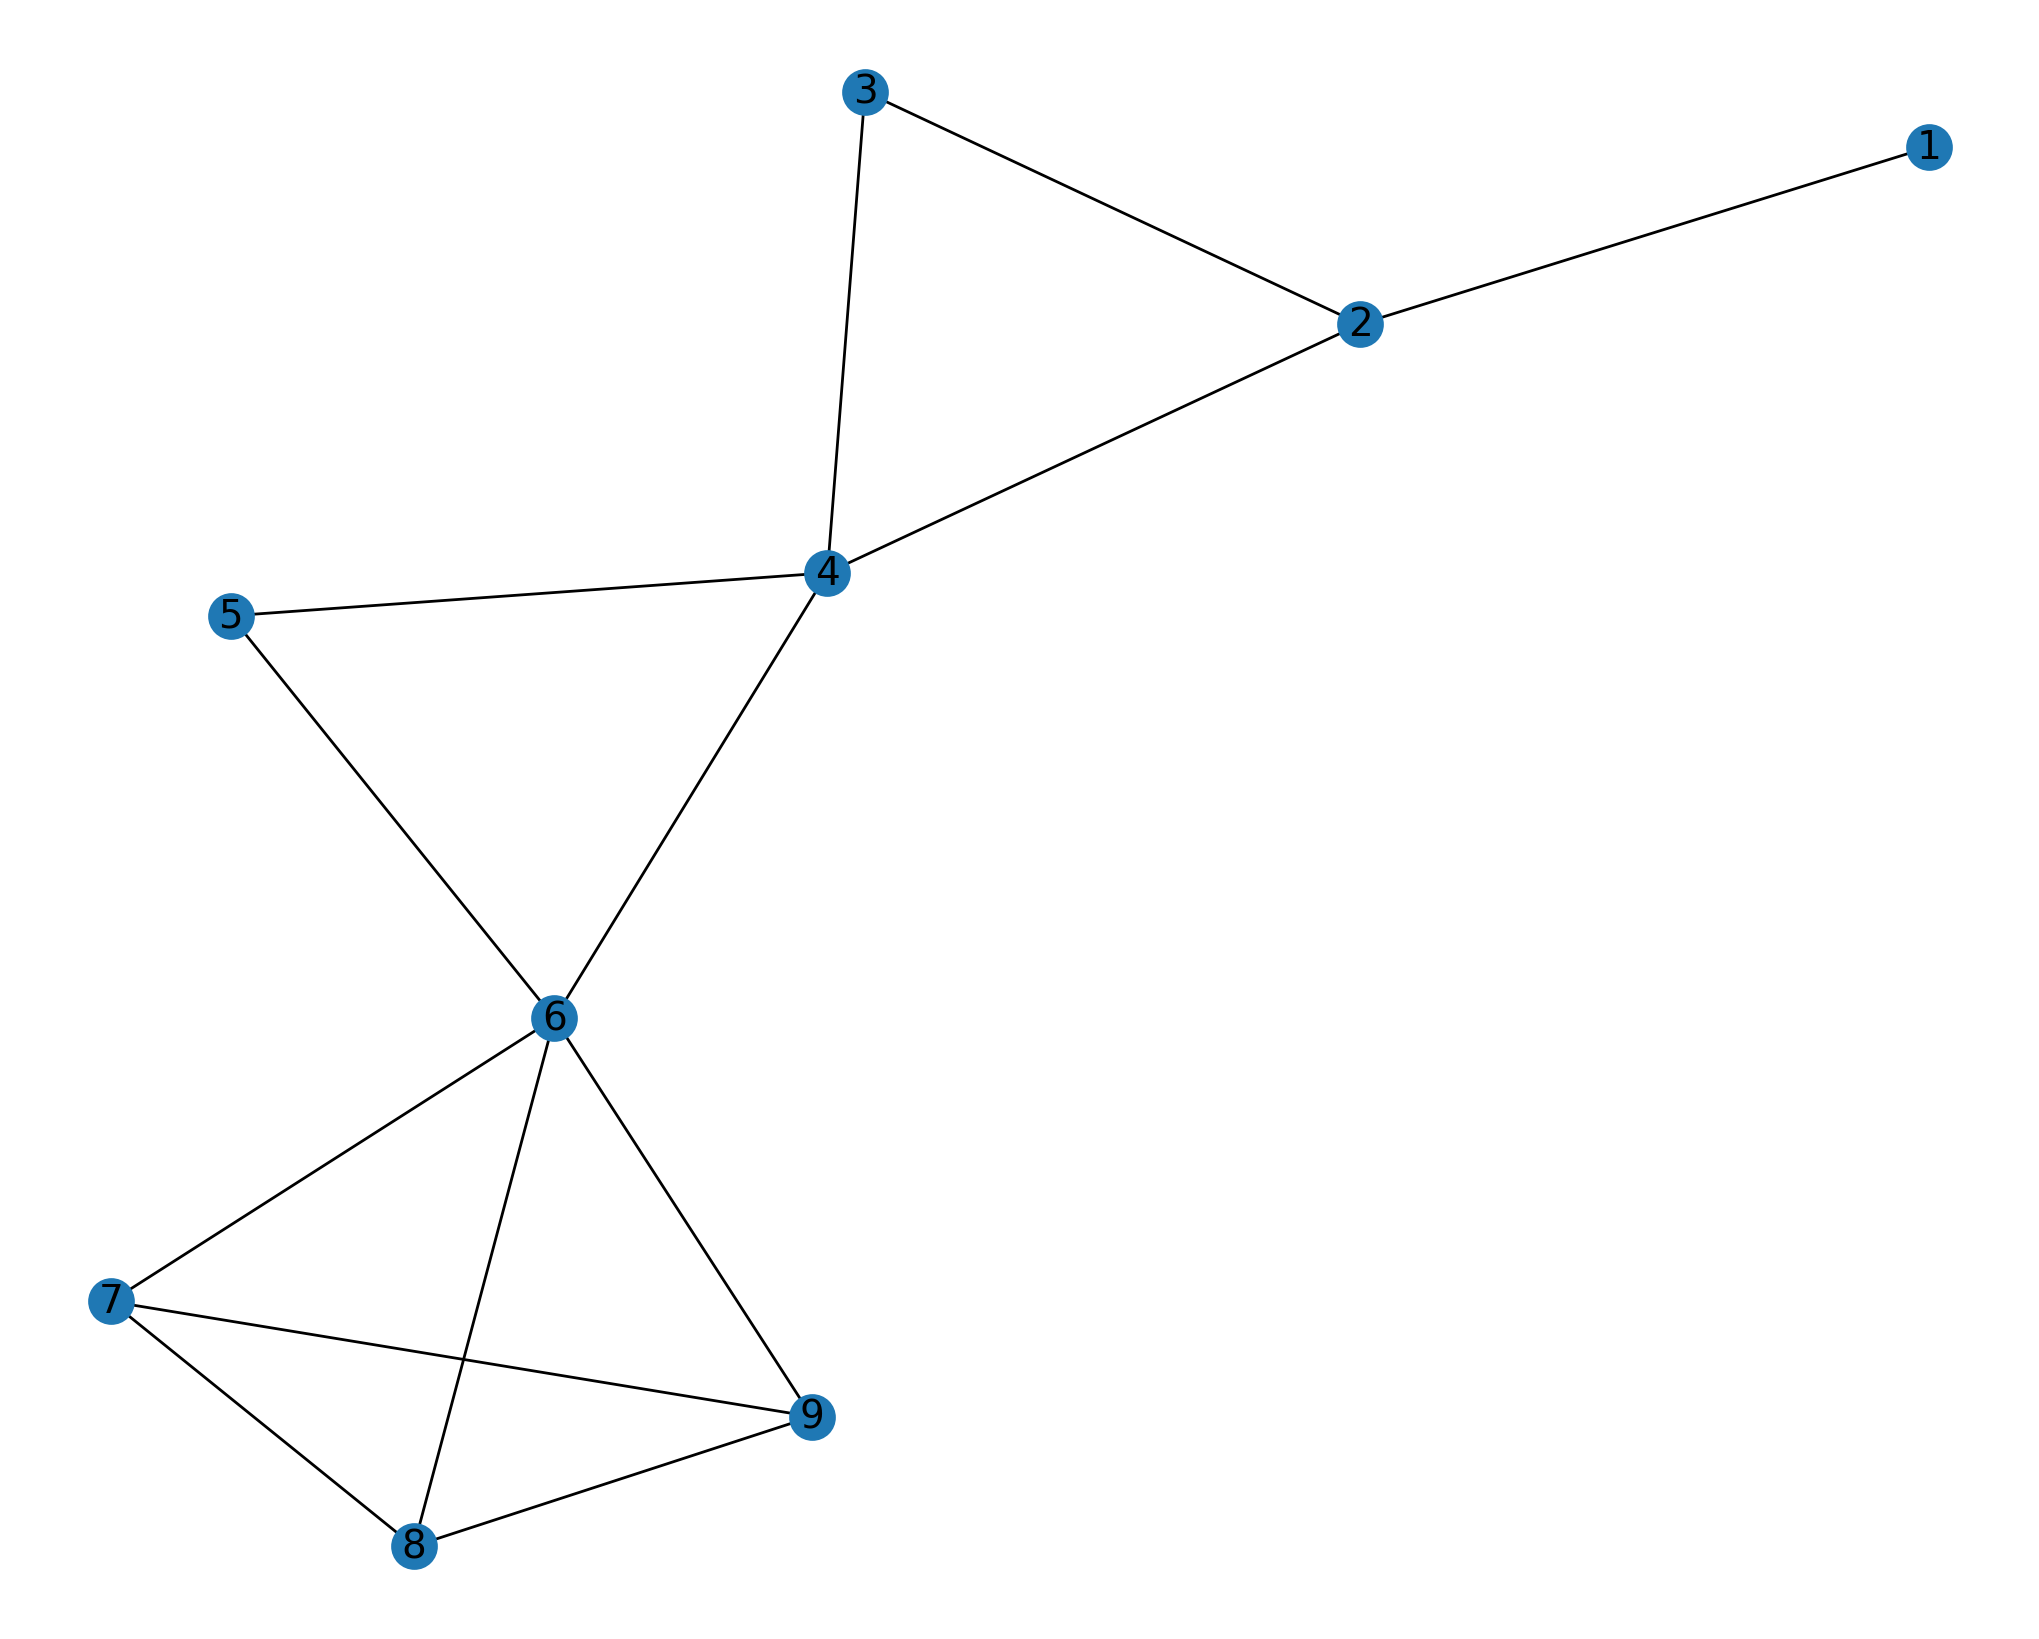

In [20]:
DrawSimplicialComplexRefatorado(simpcomplex)

## Extra

A função que tranforma o complexo simplicial em rede do networkx, é muito útil, pois ela permite realizar analises da rede:

In [21]:
G = createNetworkxFromGudhi(simpcomplex)
print(nx.info(G))

Name: 
Type: Graph
Number of nodes: 9
Number of edges: 13
Average degree:   2.8889


In [22]:
# distribuição de grau:
degreeSorted = sorted(dict(nx.degree(G)).values())
degreeSorted

[1, 2, 2, 3, 3, 3, 3, 4, 5]

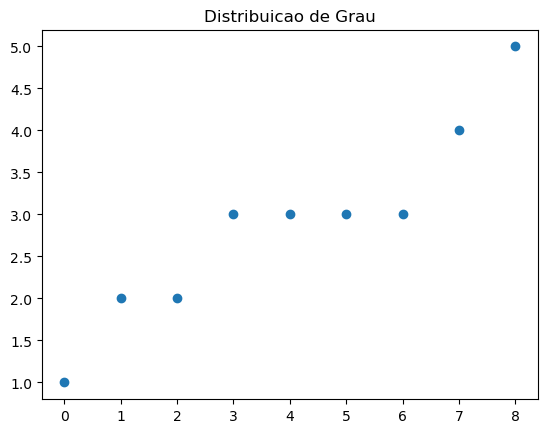

In [23]:
plt.plot(degreeSorted,'o')
plt.title('Distribuicao de Grau')
plt.show()